**Pre-Session. Refer to the following materials:**

- [Introduction to IA2](https://marsgr6.github.io/presentations/intro_to_ai_202120.slides.html#/)
- [Introduction to network models](https://marsgr6.github.io/presentations/ai_202120/slides/pdf/Intro_to_complex_networks.pdf)

**Synchronous Session. We will work on the concepts practically with the following code:**

- [Notebooks](https://github.com/marsgr6/r-scripts/tree/master/notebooks)
- [Python networkx](https://github.com/marsgr6/presentations/blob/master/ai_202120/graphs/grid_small_world.ipynb)


**Post-Session. Refer to the following materials and complete the suggested activities:**

- Plot the Ring Matrix using seaborn, sns
- Try to implement a 1D small-world (Watts-Strogatz)
- Review the class materials, week 1 and 2.
- Check: https://github.com/benmaier/smallworld

- **For the first graded homework, check:** https://github.com/marsgr6/r-scripts/blob/master/notebooks/intro_to_cn_p2.ipynb
  - Groups of 5 students. 

- Sources and resources
  - https://graph-tool.skewed.de/
  - [NetworkX Intro](https://deepnote.com/workspace/mario-gonzalez-911d-e512259f-42a9-4514-8972-e208f19e4b48/project/ms202210-6270f206-ff88-4533-afc5-e2a8c2de37fb/notebook/16_intro_to_complex_networks-a2a3abcb4d044b428ab564de8176bc35)

### Implement a random network

- https://en.wikipedia.org/wiki/Erd%C5%91s%E2%80%93R%C3%A9nyi_model

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli
import seaborn as sns

In [ ]:
N = 10  # Nodes
# k is the network degree: average connections per node (max is N-1)
# no self connections are allowed
k = 2  
p = k / N  # Connection probability in terms of k and N

<AxesSubplot:>

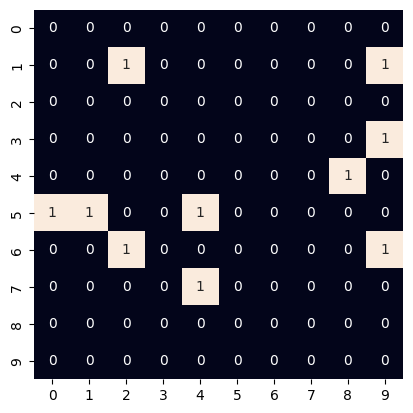

In [ ]:
# Adjacency matrix
AM = bernoulli.rvs(p, size=(N,N))
np.fill_diagonal(AM, 0)
sns.heatmap(AM, cbar=False, square=True, annot=True)

In [ ]:
# edge list
edge_list = [edge for edge in zip(*np.where(AM))]
edge_list

[(1, 2),
 (1, 9),
 (3, 9),
 (4, 8),
 (5, 0),
 (5, 1),
 (5, 4),
 (6, 2),
 (6, 9),
 (7, 4)]

In [ ]:
# Adjacency list (dictionary)
adj_list = {node: np.where(neighborhood)[0] for node, neighborhood in enumerate(AM)}
adj_list

{0: array([], dtype=int64),
 1: array([2, 9]),
 2: array([], dtype=int64),
 3: array([9]),
 4: array([8]),
 5: array([0, 1, 4]),
 6: array([2, 9]),
 7: array([4]),
 8: array([], dtype=int64),
 9: array([], dtype=int64)}

In [ ]:
def draw_edge(a, b, hw = 0):
    # Connects points a and b with an arrow: a-->b
    plt.arrow(a[0], a[1], b[0] - a[0], b[1] - a[1], 
              head_width = hw, length_includes_head = True, color="green"
              )

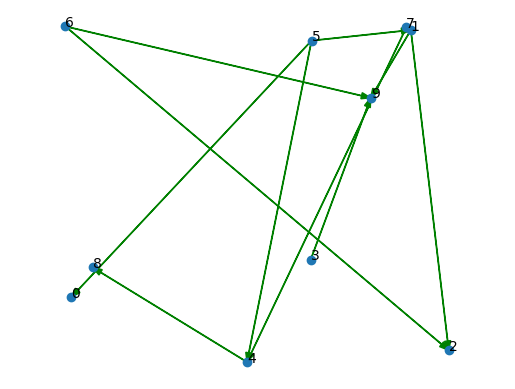

In [ ]:
# Random layout
xy = np.random.random((N,2))
plt.plot(xy[:,0], xy[:,1], 'o')
[plt.text(xy[i,0], xy[i,1], str(i)) for i in range(N)]
[draw_edge((xy[edge[0],0], xy[edge[0],1]), 
(xy[edge[1],0], xy[edge[1],1]), hw=0.015) for edge in edge_list];
plt.axis('off'); plt.axis('equal');

![](https://upload.wikimedia.org/wikipedia/commons/thumb/7/78/Polar_to_cartesian.svg/250px-Polar_to_cartesian.svg.png)

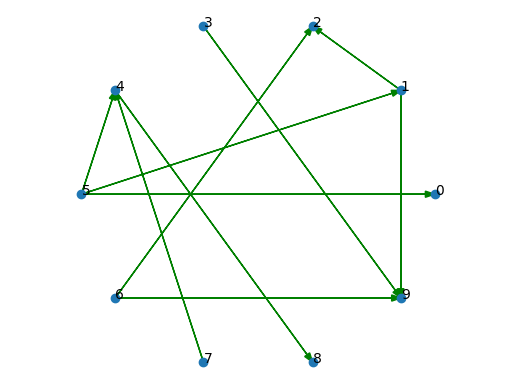

In [ ]:
# circular layout
# Random layout
angle = np.linspace(0, 2*np.pi, N, endpoint=False)
x = np.cos(angle)
y = np.sin(angle)

xy = np.array([x, y]).T

plt.plot(xy[:,0], xy[:,1], 'o')
[plt.text(xy[i,0], xy[i,1], str(i)) for i in range(N)]
[draw_edge((xy[edge[0],0], xy[edge[0],1]), 
(xy[edge[1],0], xy[edge[1],1]), hw=0.035) for edge in edge_list];
plt.axis('off'); plt.axis('equal');

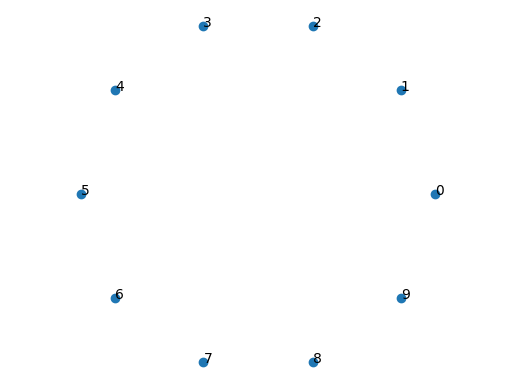

In [ ]:
# what is a ring
plt.plot(xy[:,0], xy[:,1], 'o')
[plt.text(xy[i,0], xy[i,1], str(i)) for i in range(N)];
plt.axis('off'); plt.axis('equal');

In [ ]:
def draw_edge(a, b, ni, nj, hw=0, color='green'):
    # Connects points a and b with an arrow: a-->b
    plt.arrow(a[0], a[1], b[0] - a[0], b[1] - a[1], 
              head_width = hw, length_includes_head = True, color=color
              )

def plot_circular_layout(adj_list, hw=0.0, rewired_arcs=None):

    t = np.linspace(0, 2*np.pi, N, endpoint=False)

    x = np.cos(t)
    y = np.sin(t)

    plt.figure(figsize=(6,6))
    plt.plot(x, y, '.', ms=30)
    plt.axis('off')
    for i in range(N):
        plt.text(x[i]-0.015, y[i]-0.015, i, c='w')
    e = [draw_edge([x[a], y[a]], [x[b], y[b]], a, b, hw) 
         for a in adj_list for b in adj_list[a] if len(adj_list[a])]
    
    if rewired_arcs is not None:
        e = [draw_edge([x[a], y[a]], [x[b], y[b]], a, b, 0.06, color="red") 
         for a in rewired_arcs for b in rewired_arcs[a] if len(rewired_arcs[a])]

In [ ]:
# Build a ring network of degree k
N = 11
k = 4

nodes = np.arange(N)

C = np.zeros((N, k), dtype='int')
for ki in range(k//2):
    C[:, 2*ki] = nodes + (ki+1)  # right neihgbor
    C[:, 2*ki+1] = nodes - (ki+1)  # left neihgbor

C[np.where(C < 0)] += N
C[np.where(C >= N)] -= N

C

array([[ 1, 10,  2,  9],
       [ 2,  0,  3, 10],
       [ 3,  1,  4,  0],
       [ 4,  2,  5,  1],
       [ 5,  3,  6,  2],
       [ 6,  4,  7,  3],
       [ 7,  5,  8,  4],
       [ 8,  6,  9,  5],
       [ 9,  7, 10,  6],
       [10,  8,  0,  7],
       [ 0,  9,  1,  8]])

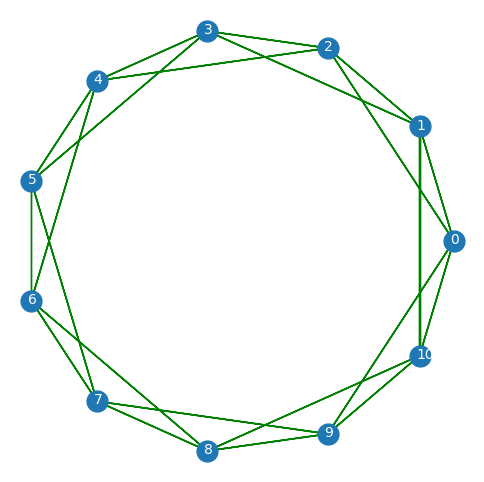

In [ ]:
adj_list = {node: neighborhood for node, neighborhood in enumerate(C)}
plot_circular_layout(adj_list)

### Post session activities

- Plot the heatmap of the ring network.

- Implement a small-world network
  - The network has three parameters, $N, k, \omega$.
  - $\omega = k_r/K$, is a fraction of random connections, it is a value between 0 and 1.
  - Start with a ring and rewire, remove ring connection and create a random shortcut, with probability $\omega$.
  - To reuse the function (plot_circular_layout([...])) above and draw the changes use:
  ```Python
  rewired_arcs = {i: list(set(C[i])-set(R[i])) for i in range(N)}
  ```
  - Where R is the original ring network, and C the small-world network.

### Next class, we will implement an activity network:
- Check: https://arxiv.org/pdf/cond-mat/0603396.pdf

In [ ]:
w = 0.5  # 50% of connections will be rewired
node = 0

available_nodes = set(nodes) - set(list(C[node])+[node])
available_nodes

{3, 4, 5, 6, 7, 8}

In [ ]:
R = C.copy()  # original ring
C

array([[ 1, 10,  2,  9],
       [ 2,  0,  3, 10],
       [ 3,  1,  4,  0],
       [ 4,  2,  5,  1],
       [ 5,  3,  6,  2],
       [ 6,  4,  7,  3],
       [ 7,  5,  8,  4],
       [ 8,  6,  9,  5],
       [ 9,  7, 10,  6],
       [10,  8,  0,  7],
       [ 0,  9,  1,  8]])

In [ ]:
C = R.copy()
omega = 0.1  # rewire 10% of the connections
all_nodes = set(range(N))
for node in range(N):
    for ki in range(k):
        # rewire
        if np.random.random() < omega:
            available_nodes = list(all_nodes - set(list(C[node]) + [node]))
            C[node][ki] = np.random.choice(available_nodes)
C

array([[ 1, 10,  2,  9],
       [ 2,  0,  3, 10],
       [ 3,  1,  4,  0],
       [ 4,  2,  5,  1],
       [ 5,  3,  6,  0],
       [ 6,  4,  7,  3],
       [ 7,  5,  8,  4],
       [ 8,  6,  9,  5],
       [ 9,  7, 10,  4],
       [10,  8,  0,  7],
       [ 0,  9,  3,  2]])

In [ ]:
rewired_arcs = {i: list(set(C[i])-set(R[i])) for i in range(N)}
rewired_arcs


{0: [],
 1: [],
 2: [],
 3: [],
 4: [0],
 5: [],
 6: [],
 7: [],
 8: [4],
 9: [],
 10: [2, 3]}

In [ ]:
3/(N*k)

0.06818181818181818

<AxesSubplot:>

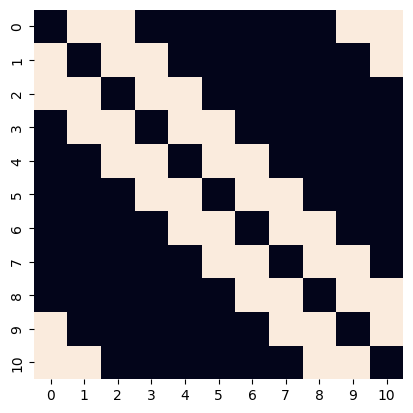

In [ ]:
adj_matrix = np.zeros((N, N), dtype='int')
for node in range(N):
    adj_matrix[node][R[node]] = 1
sns.heatmap(adj_matrix, cbar=False, square=True)

<AxesSubplot:>

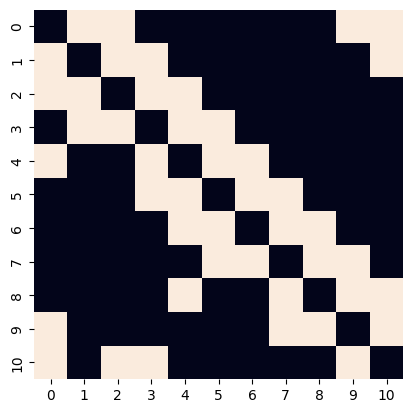

In [ ]:
adj_matrix = np.zeros((N, N), dtype='int')
for node in range(N):
    adj_matrix[node][C[node]] = 1
sns.heatmap(adj_matrix, cbar=False, square=True)

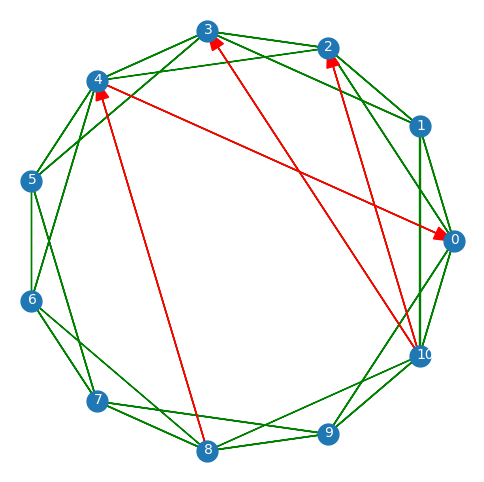

In [ ]:
adj_list = {node: neighbors for node,neighbors in enumerate(C)}
plot_circular_layout(adj_list, rewired_arcs=rewired_arcs)

<img src="image-20231004-193811.png" width="" align="" />

In [ ]:
# Nodes (neuron) states in time 0
xi = bernoulli.rvs(0.5, size=N)
xi

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1])

In [ ]:
W = bernoulli.rvs(0.5, size=(N,k))*2-1
W

array([[-1,  1, -1,  1],
       [-1, -1,  1, -1],
       [ 1,  1,  1,  1],
       [ 1, -1, -1, -1],
       [ 1,  1, -1,  1],
       [-1,  1,  1,  1],
       [-1, -1, -1,  1],
       [ 1, -1, -1,  1],
       [ 1, -1,  1,  1],
       [-1, -1, -1,  1],
       [-1, -1, -1, -1]])

In [ ]:
x = np.random.randint(10, size=10)
x

array([4, 2, 4, 9, 4, 3, 4, 3, 0, 3])

In [ ]:
x.mean(), x.std()

(3.6, 2.154065922853802)

In [ ]:
(x - x.mean()).mean()

0.0

In [ ]:
((x - x.mean())/x.std()).std()

0.9999999999999998

In [ ]:
node = 0
node, C[node], xi[C[node]], W[node], xi[C[node]]*W[node], (xi[C[node]]*W[node]).sum(), (xi[C[node]]*W[node]).sum() >= 0

(0,
 array([ 1, 10,  2,  9]),
 array([0, 1, 0, 0]),
 array([-1,  1, -1,  1]),
 array([0, 1, 0, 0]),
 1,
 True)

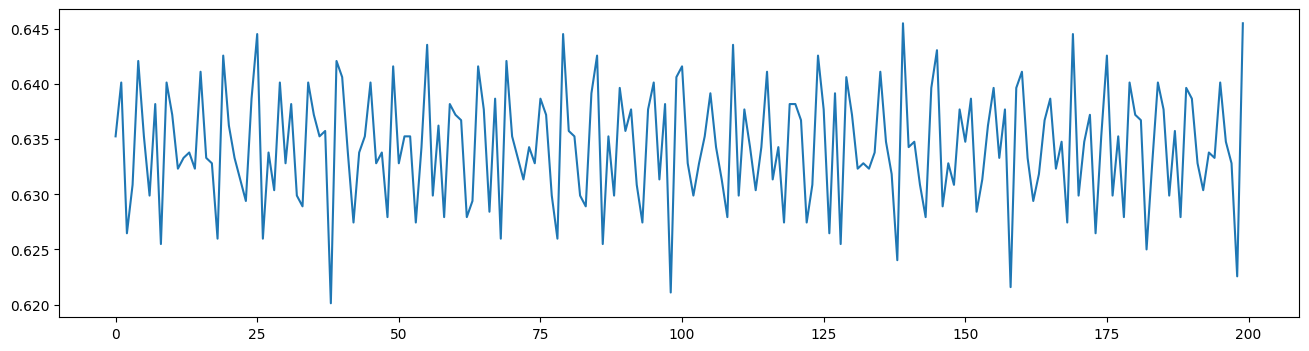

In [ ]:
N=2048
k = 4
C = []
for u in range(N):
    C += [[]]
    for ki in range(k//2):
        C[u] += [u+ki+1, u-(ki+1)]
C = np.array(C)
C[np.where(C < 0)] += N
C[np.where(C >= N)] -= N

# Rewiring
omega = 0.0  # rewire 10% of the connections
all_nodes = set(range(N))

for node in range(N):
    for ki in range(k):
        # rewire
        if np.random.random() < omega:
            available_nodes = list(all_nodes - set(list(C[node]) + [node]))
            C[node][ki] = np.random.choice(available_nodes)

x = bernoulli.rvs(p=0.5, size=N)  # neural states

activity = [x.mean()]

#print(x)
S = bernoulli.rvs(p=0.5, size=(N, k))*2-1  # (C) connections weihgts

time = 1000

for t in range(time):
    x_t = x.copy()  # update with previous state
    for ni in range(N):
        x[ni] = int((x_t[C[ni]]*S[ni]).sum() >= 0)
    #print(x)
    activity += [x.mean()]

plt.figure(figsize=(16,4))
plt.plot(activity[-200:])

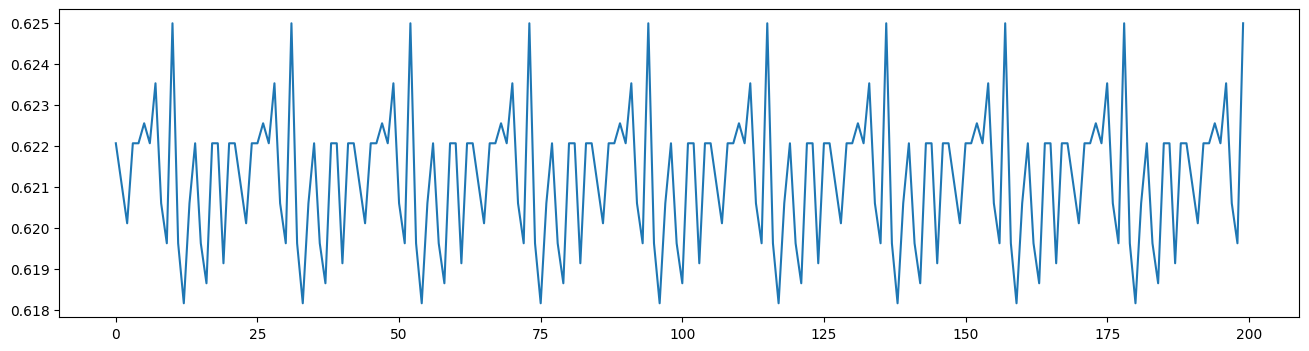

In [ ]:
N=2048
k = 4

C = np.random.randint(N, size=(N,k))

x = bernoulli.rvs(p=0.5, size=N)  # neural states

activity = [x.mean()]

#print(x)
S = bernoulli.rvs(p=0.5, size=(N, k))*2-1  # (C) connections weihgts

time = 1000

for t in range(time):
    x_t = x.copy()  # update with previous state
    for ni in range(N):
        x[ni] = int((x_t[C[ni]]*S[ni]).sum() >= 0)
    #print(x)
    activity += [x.mean()]

plt.figure(figsize=(16,4))
plt.plot(activity[-200:])

### Post-session: 

- Answer: how small could be the value of $\omega$ so that you observed a ciclic behavior.

### First partial project

- Implement a recommender system using graphs
- Dataset: https://www.kaggle.com/code/saurav9786/recommender-system-using-amazon-reviews

<img src="image-20231004-201241.png" width="" align="" />

The dataset contains a bipartite network

![](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b9/Simple_bipartite_graph%3B_two_layers.svg/327px-Simple_bipartite_graph%3B_two_layers.svg.png)

- Perform a bipartite projection and create a product network

- Check: https://en.wikipedia.org/wiki/Bipartite_network_projection

![](https://upload.wikimedia.org/wikipedia/commons/f/f9/Bipartite_network_projection.png)

- Once you have the remmender network (products connected by recommendations)
  - Select a node
  - Return top $n$ neighbors (largest weights)

- Some recommendations:
  - Trim de dataset
  - Keep only 5 stars reviews
  - Trim de dataset, top users, top products

- Trim the network
  - By degree

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=cce3455d-da08-4c10-a6fe-39f2a30c6a51' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>